<a href="https://colab.research.google.com/github/YashkumarBhatt/Unified-Mentor-Internship/blob/main/Netflix_data_cleaning_analysis_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we will analyze NETFLIX movies and show data consisting of title of movies, genre, director, release date, duration, rating countries and so on. The goal of the project is to explore trends and relationships among the variables. Since the data is largely descriptive and categorical, the scope of implying Machine Learning (ML) is very limited hence we will limit our project to EDA only. Nevertheless, it will still give us useful insights such as the most common genre, time-varying trends, country-specific viewerships and so on.

In [ ]:
# Imporitng all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing and inspecting the data
df = pd.read_csv('netflix1.csv')
df.head()
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
# Cleaning and Processing the data for EDA

df.drop_duplicates(inplace=True)

df['director'].fillna('Not Specified', inplace=True)
df['country'].fillna('Not Specified', inplace=True)
df['date_added'].fillna(method='ffill', inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'])

df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month_name()

In the EDA part below, we will try to explore the trends and unveil any relationships among the variables using different types of graphs and charts.

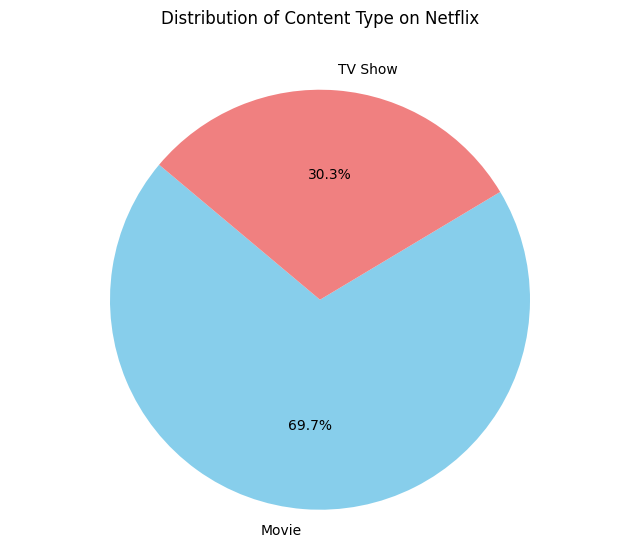

In [ ]:
# Distribution of content type
content_counts = df['type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Content Type on Netflix', y=1.08)
plt.axis('equal')
plt.show()

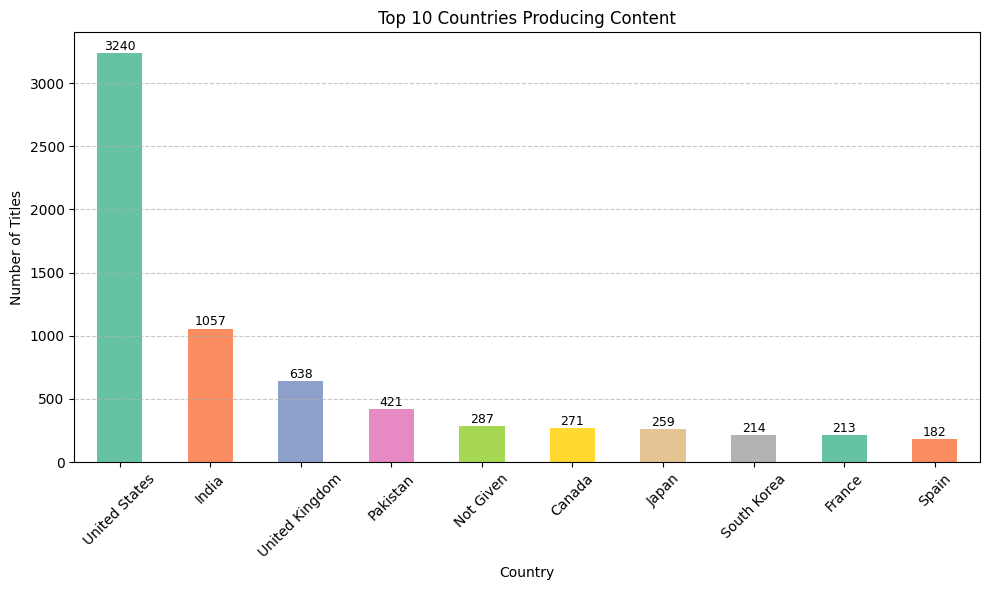

In [ ]:
# Top countries producing Netflix content
plt.figure(figsize=(10, 6))
top_countries = df['country'].value_counts().head(10)
colors = sns.color_palette("Set2", len(top_countries))
ax = top_countries.plot(kind='bar', color=colors)

plt.title('Top 10 Countries Producing Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

for i, val in enumerate(top_countries.values):
    plt.text(i, val + 1, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

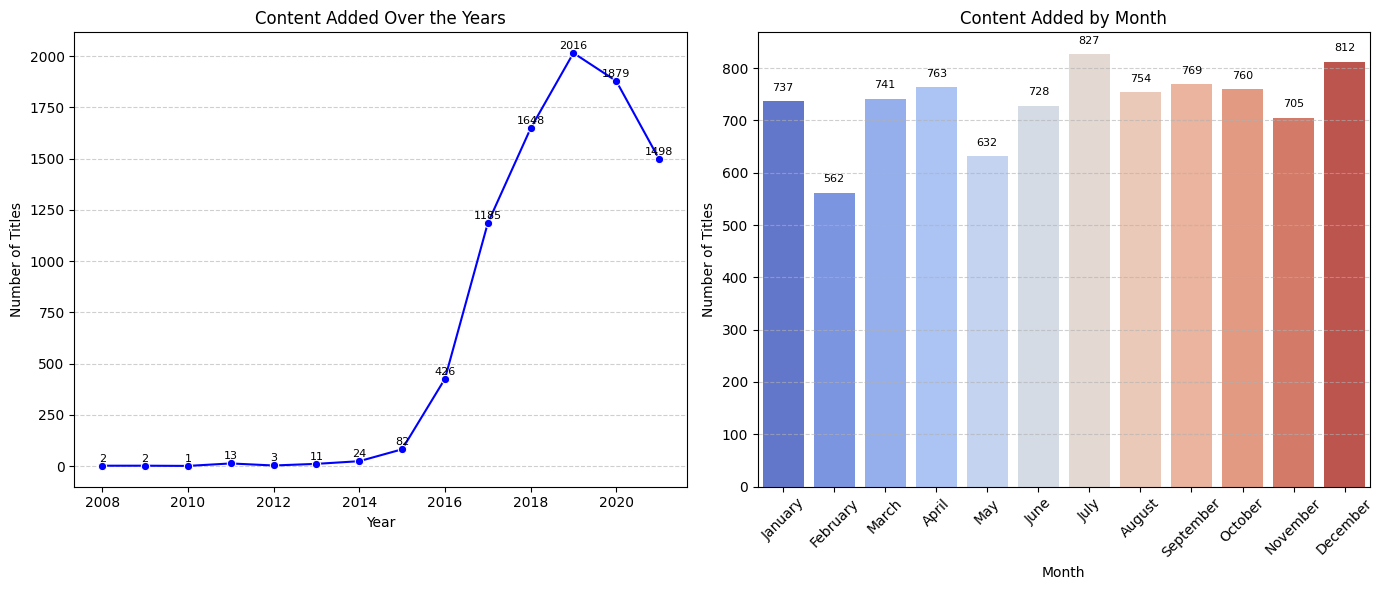

In [ ]:
# Content added over the time

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

year_counts = df['year_added'].value_counts().sort_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['month_added'].value_counts().reindex(month_order)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='blue')
for x, y in zip(year_counts.index, year_counts.values):
    plt.text(x, y + 20, str(y), ha='center', fontsize=8)
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
sns.barplot(x=month_counts.index, y=month_counts.values, palette='coolwarm')
for i, val in enumerate(month_counts.values):
    plt.text(i, val + 20, str(val), ha='center', fontsize=8)
plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

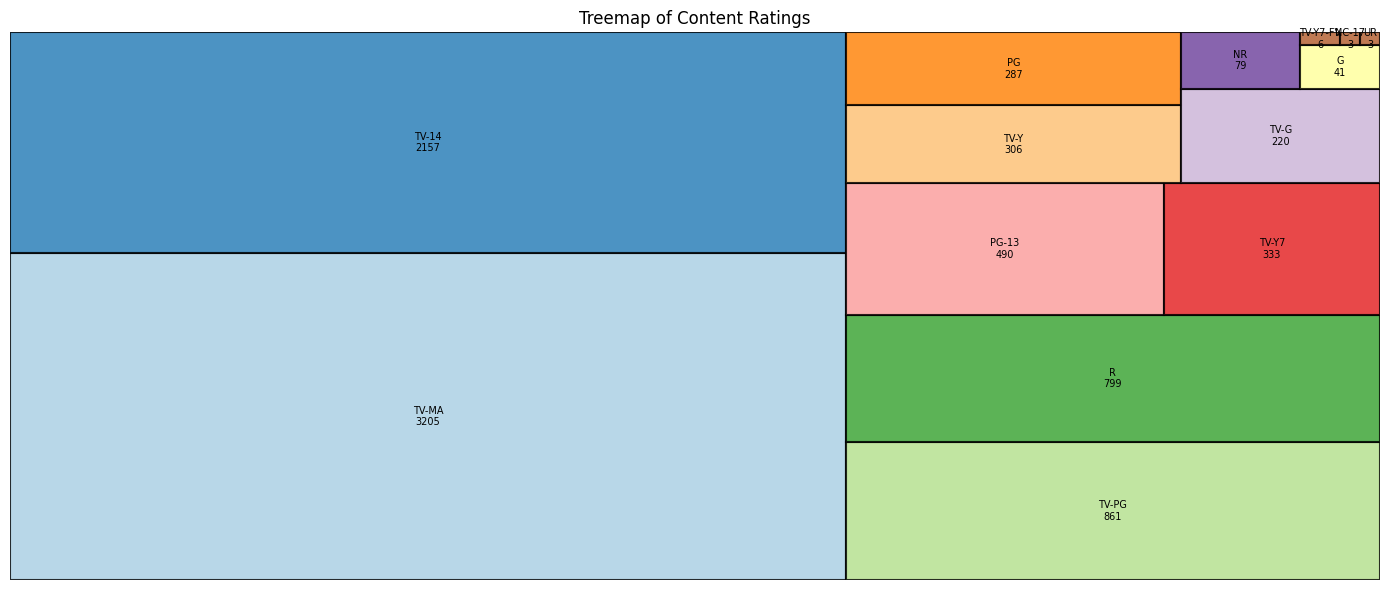

In [ ]:
import squarify

rating_counts = df['rating'].value_counts()
labels = [f'{label}\n{count}' for label, count in zip(rating_counts.index, rating_counts.values)]
sizes = rating_counts.values
colors = plt.cm.Paired(range(len(labels)))
plt.figure(figsize=(14, 6))
squarify.plot(sizes=sizes, label=labels, color=colors, edgecolor = 'black', linewidth = 1.5, alpha=0.8, text_kwargs={'fontsize':7})
plt.title('Treemap of Content Ratings')
plt.axis('off')
plt.tight_layout()
plt.show()

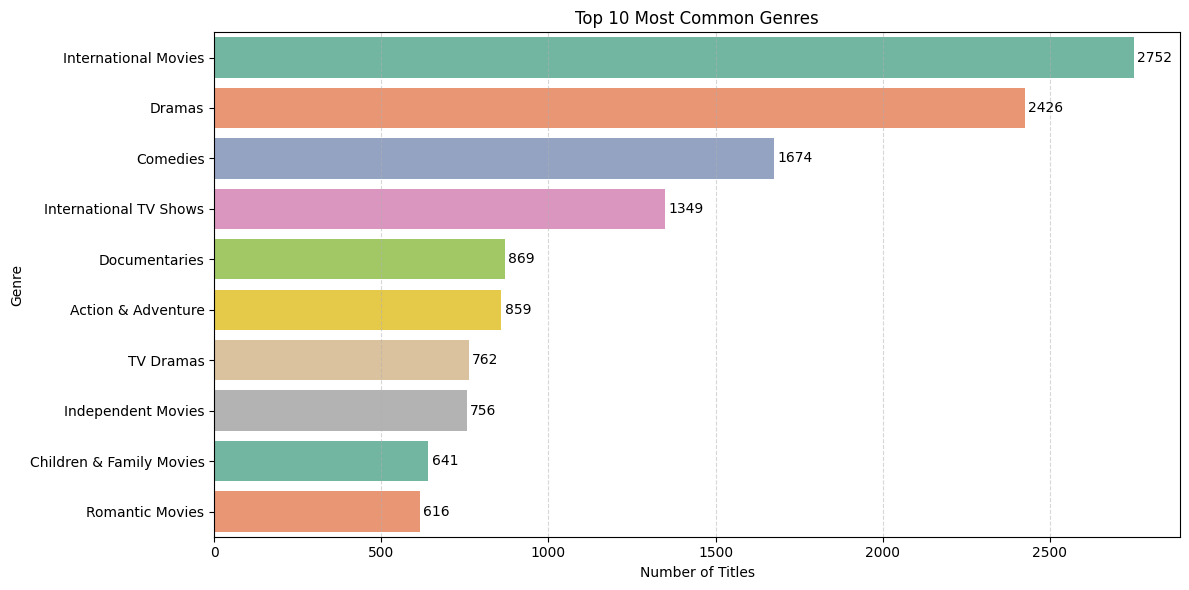

In [ ]:
#Viewing the top 10 genre
all_genres = df['listed_in'].str.split(',').explode().str.strip()

genre_counts = all_genres.value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set2')

for index, value in enumerate(genre_counts.values):
    plt.text(value + 10, index, str(value), va='center')

plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

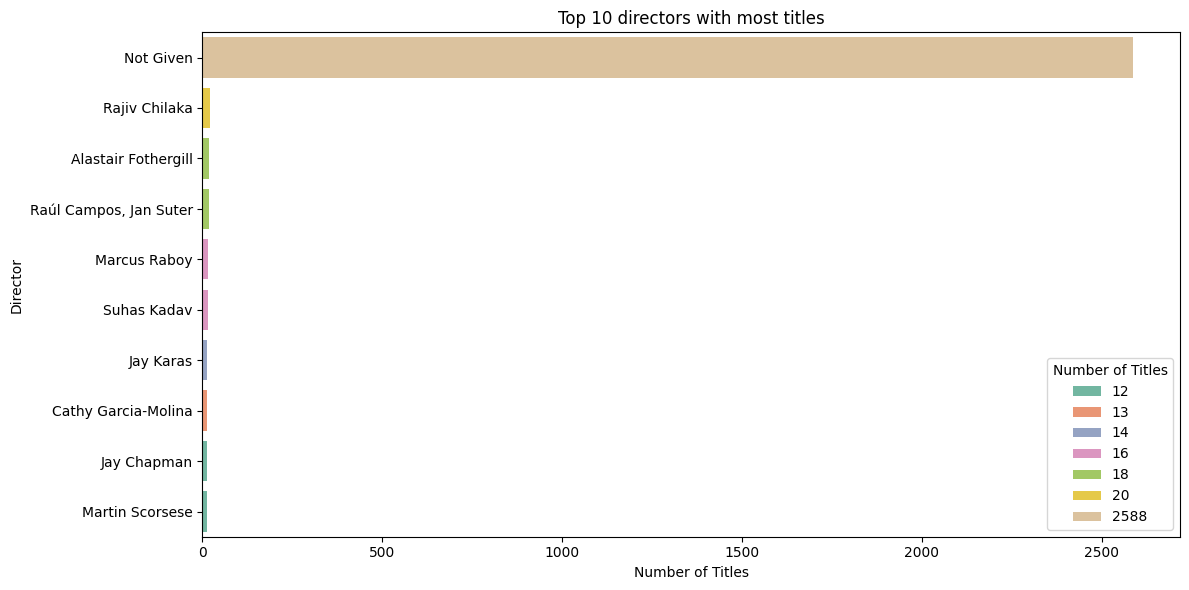

In [ ]:
# Top 10 directors with most titles
top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, hue=top_directors.values, palette='Set2')
plt.title('Top 10 directors with most titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.legend(title='Number of Titles', loc = 'lower right')
plt.show()

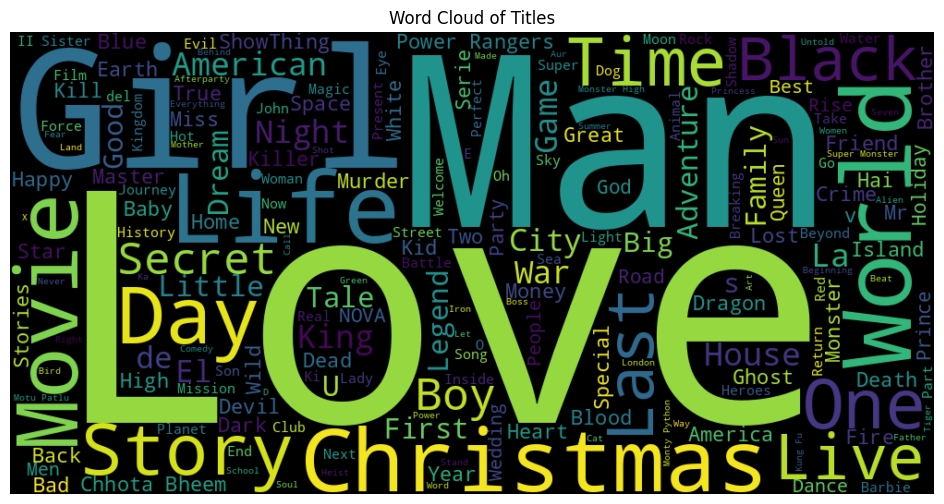

In [ ]:
# Word cloud to most common words in titles
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = ' '.join(df['title'].dropna().astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='black', stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

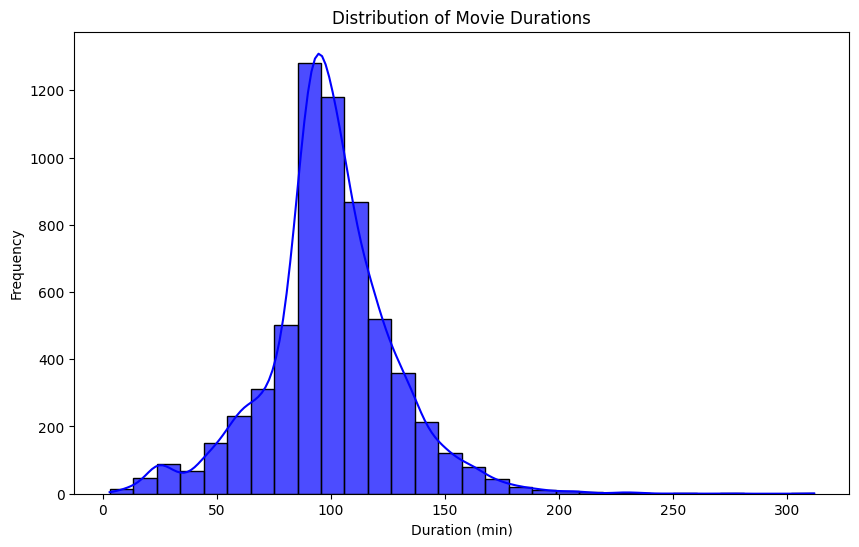

In [ ]:
# Distribution of of movies by their duration
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,6))
sns.histplot(df[df['type'] == 'Movie']['duration_num'], bins=30, kde=True, color='blue', label='Movie', alpha=0.7)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.show()


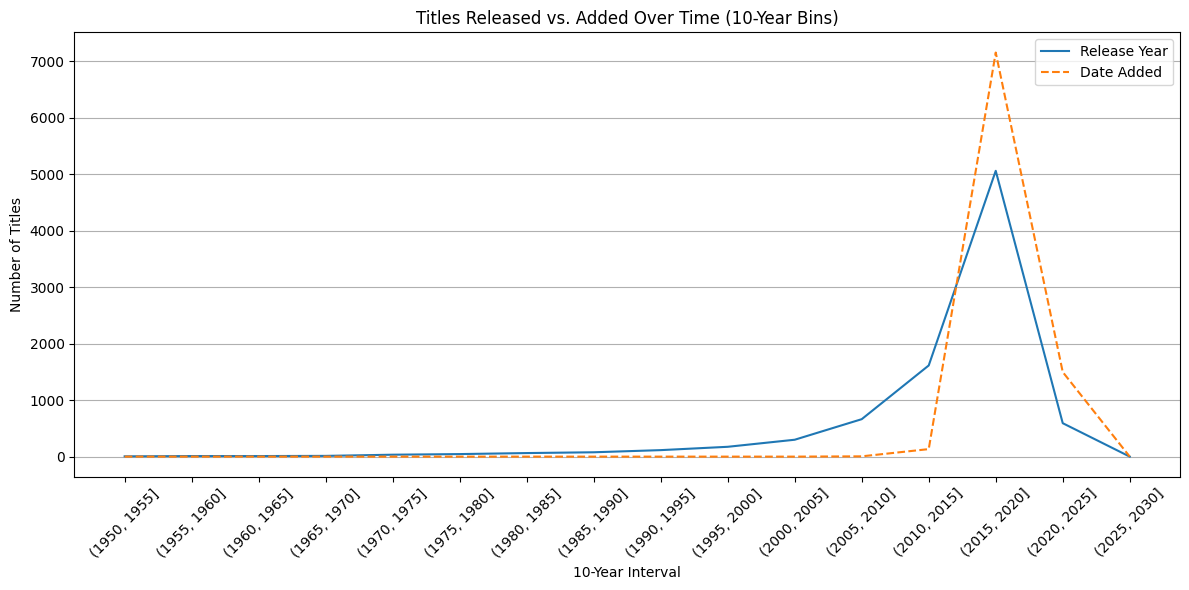

In [ ]:
# Combined plot of titles released and added to Netflix

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

bins = list(range(1950, 2031, 5))
df['release_bin'] = pd.cut(df['release_year'], bins=bins)
df['added_bin'] = pd.cut(df['year_added'], bins=bins)

release_counts = df['release_bin'].value_counts().sort_index()
added_counts = df['added_bin'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=release_counts.index.astype(str), y=release_counts.values, label='Release Year')
sns.lineplot(x=added_counts.index.astype(str), y=added_counts.values, label='Date Added', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('10-Year Interval')
plt.ylabel('Number of Titles')
plt.title('Titles Released vs. Added Over Time (10-Year Bins)')
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

The Exploratory Data Analysis reveals some interesting and useful traits. Movies make up around 70% of the titles, while TV shows are limited to 30%. Documentary, drama and comedy are the most popular genres. The US, India and the UK top the list of content added. Most of the content is rated TV-MA, focusing on mature audiences. The time period between 2010 and 2025 shows a noticeable spike in both releases and the addition of content to Netflix.